In [6]:
import cv2
from PIL import Image
import numpy as np
import os

from recognition_functions import *

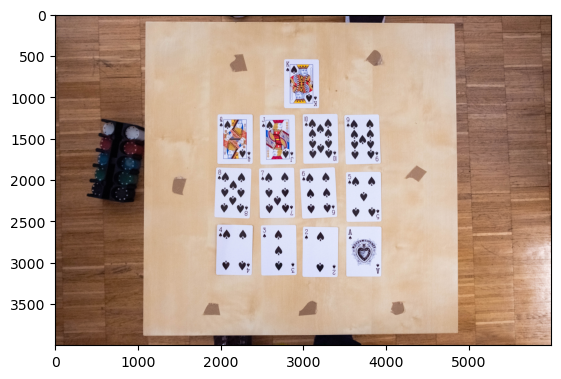

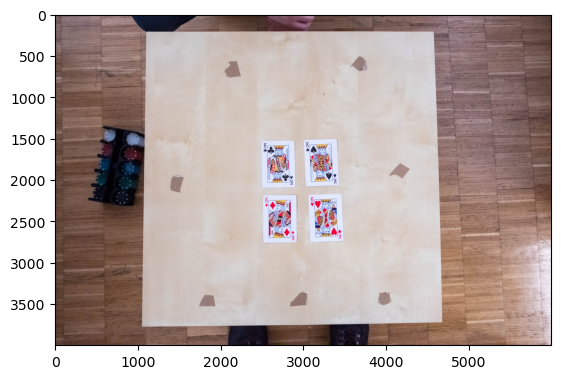

In [8]:
path_data = "data/train"
path_setup = "data/image_setup/"

spade_file = os.path.join(path_setup, f"spades_suits.jpg")
kings_file = os.path.join(path_setup, f"kings.jpg")

# open the image
im_spades = Image.open(spade_file)
plt.imshow(im_spades)
plt.show()

im_kings = Image.open(kings_file)
plt.imshow(im_kings)
plt.show()

## Spades

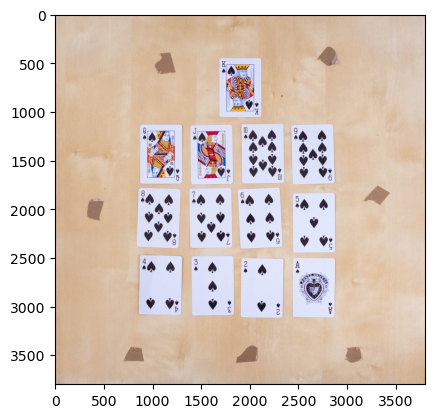

In [9]:
table_spades = table_extraction(np.array(im_spades))
plt.imshow(table_spades)
plt.show()

## Kings

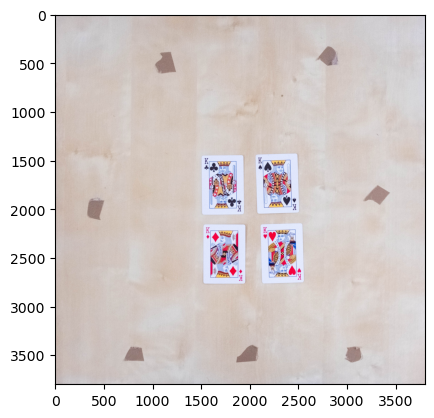

In [10]:
table_kings = table_extraction(np.array(im_kings))
plt.imshow(table_kings)
plt.show()

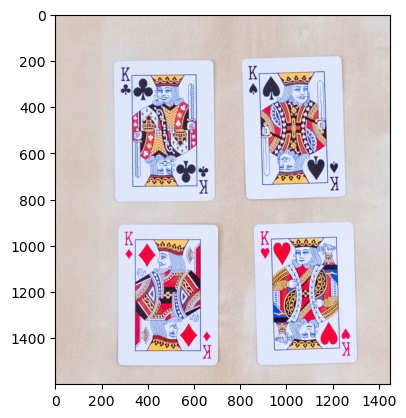

In [14]:
selected_kings = table_kings[1250:2850, 1250:2700]
plt.imshow(selected_kings)
plt.show()

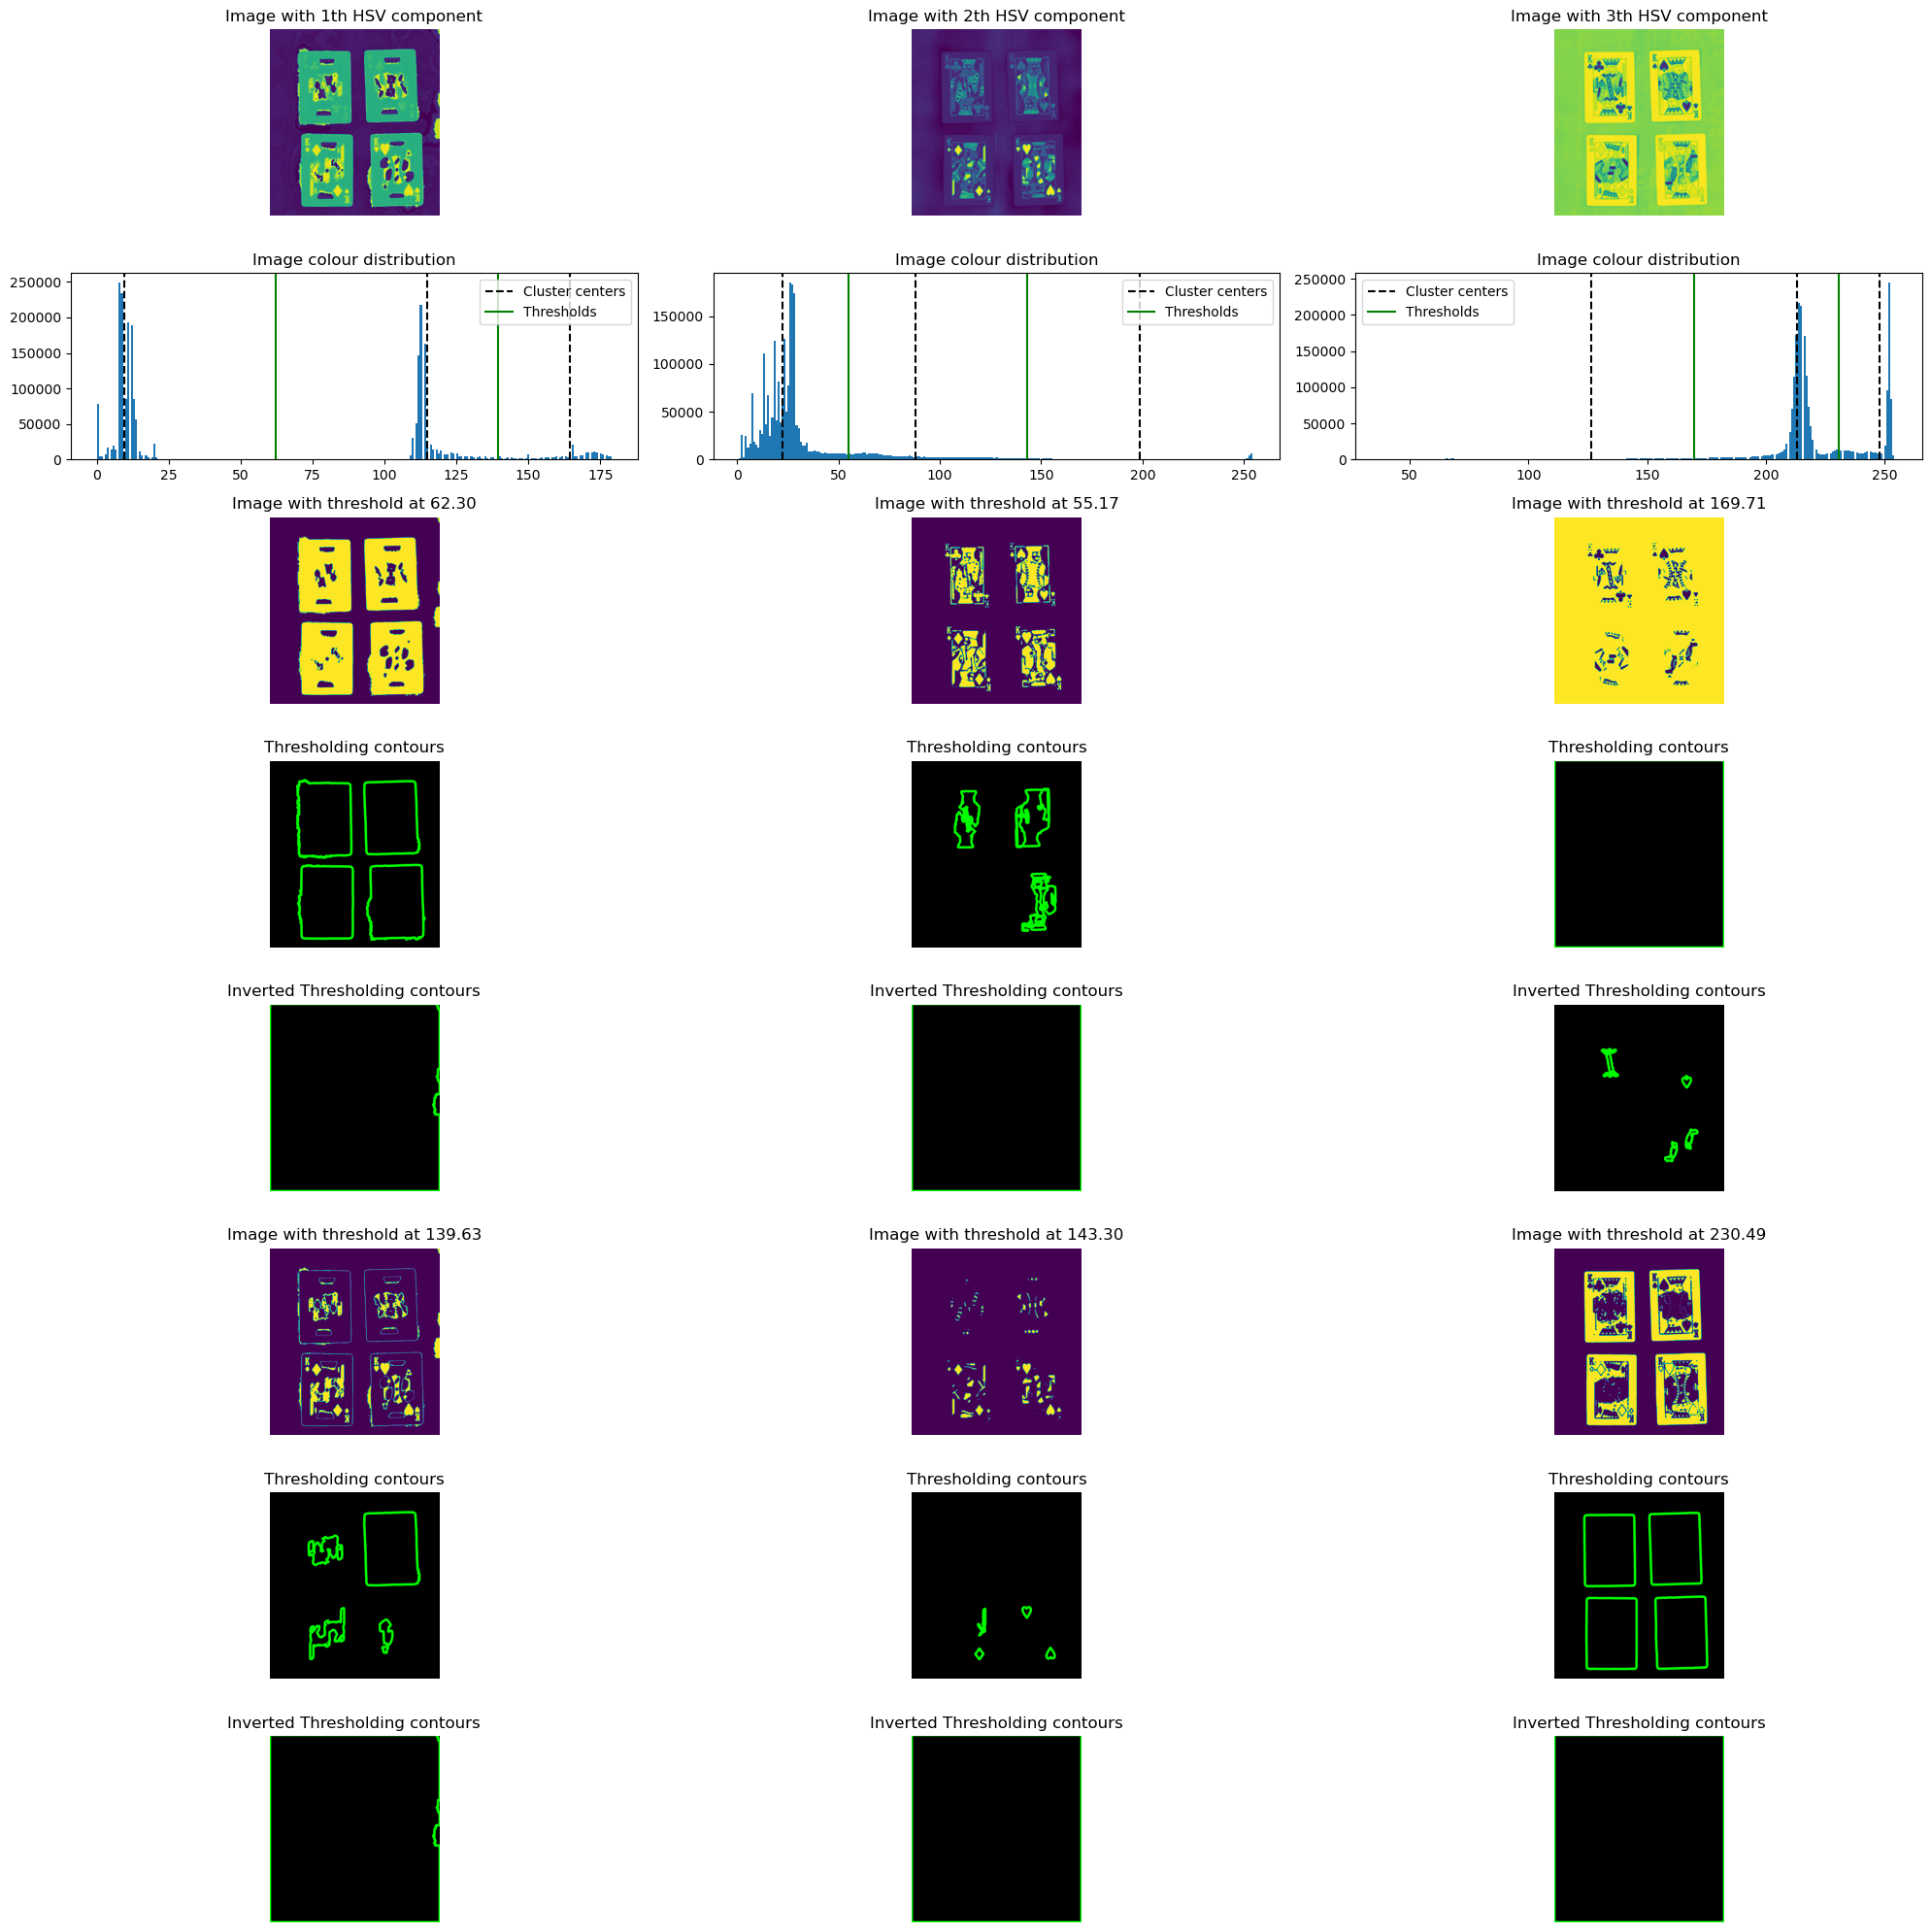

In [16]:
can_contours = extract_candidate_contours(selected_kings, 4, plot = True)

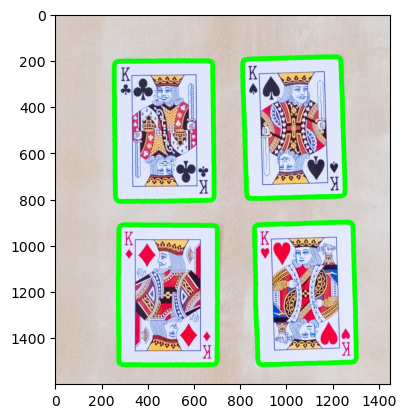

In [38]:
img = cv2.drawContours(selected_kings.copy(), can_contours[10], -1,(0,255,0),20)
plt.imshow(img)
plt.show()

In [39]:
card_size = [300,400]


contour_corners = []
for card_contour in can_contours[10]:
    peri = cv2.arcLength(card_contour,True)
    approx = cv2.approxPolyDP(card_contour,0.02*peri,True)
    corners = np.array(approx[:,0,:],np.float32) #Just remove useless middle dimension

    corners = reorder_corners(corners)
    contour_corners.append(corners)
    
extracted_cards = []
for corners in contour_corners:

    h = np.array([[0,0],[card_size[0],0],[card_size[0],card_size[1]],[0,card_size[1]] ],np.float32)

    transform = cv2.getPerspectiveTransform(corners, h)
    card = cv2.warpPerspective(selected_kings,transform,card_size)
    extracted_cards.append(card)

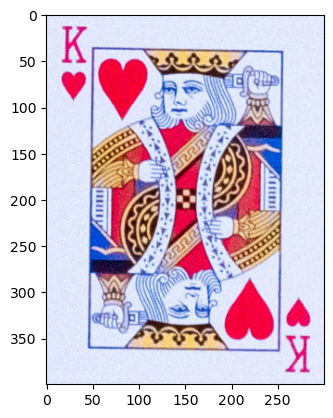

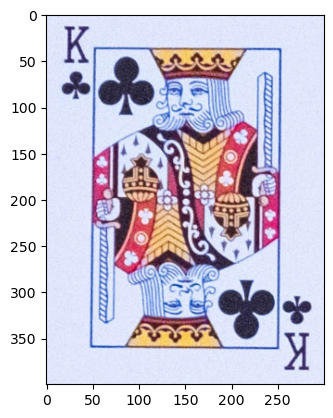

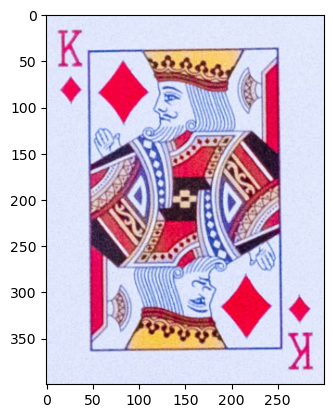

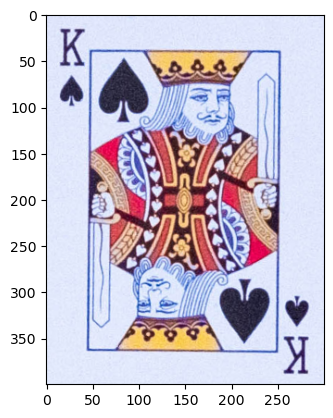

In [40]:
for i,card in enumerate(extracted_cards):
    plt.imshow(card)
    plt.show()

In [151]:
def extract_symbol_feature(card):
    
    def crop_symbol(card):
        return card[55:105, 5:50]
    
    # Focus on symbol
    cropped = crop_symbol(card)
    
    # Extract contour
    gray = cv2.cvtColor(cropped,cv2.COLOR_BGR2GRAY)
    flag, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(~thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    best_contour = sorted(contours, key=cv2.contourArea,reverse=True)[0]
    
    # Extract main pixels color
    red_pix = (card[:,:,0] >100) & (card[:,:,1] < 40) & (card[:,:,2] > 40)
    black_pix = (card[:,:,0]< 100) & (card[:,:,1] < 100) & (card[:,:,2] < 100)
    color = 'r' if red_pix.sum() > black_pix.sum() else 'b'
    
    # Extract peri / area ratio
    peri = cv2.arcLength(best_contour,True)
    area = cv2.contourArea(best_contour)
    
    return (best_contour, color, peri / area)

In [ ]:
card_imgs = [crop_color(card) for card in extracted_cards]



r 0.20029938985139895


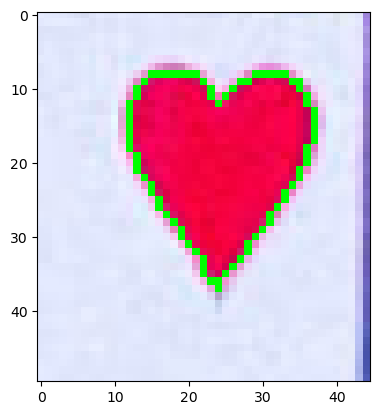

b 0.33223043968741645


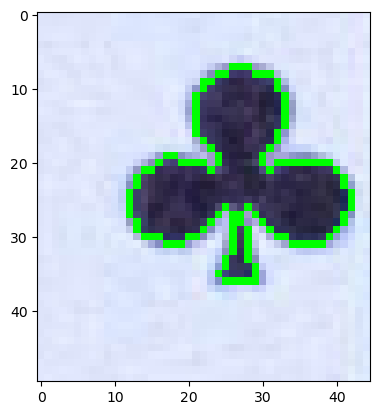

r 0.2575411630231281


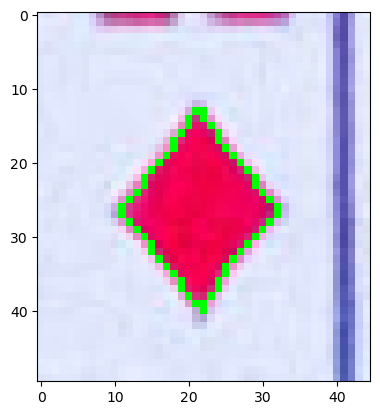

b 0.2811340123737762


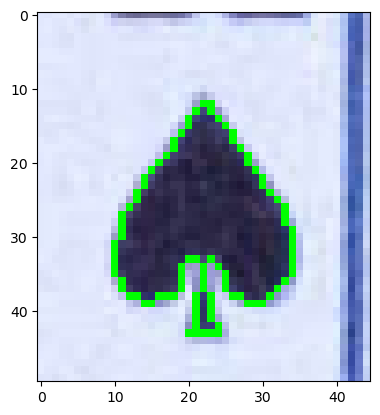

In [150]:
def crop_color(img):
    return img[55:105, 5:50]


features = []

for card in card_imgs:
    
    gray = cv2.cvtColor(card,cv2.COLOR_BGR2GRAY)
    flag, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)

    contours, _ = cv2.findContours(~thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    best_contour = sorted(contours, key=cv2.contourArea,reverse=True)[0]
    
    # Extract main pixels color
    red_pix = (card[:,:,0] >100) & (card[:,:,1] < 40) & (card[:,:,2] > 40)
    black_pix = (card[:,:,0]< 100) & (card[:,:,1] < 100) & (card[:,:,2] < 100)
    color = 'r' if red_pix.sum() > black_pix.sum() else 'b'
    
    # Extract peri / area ratio
    peri = cv2.arcLength(best_contour,True)
    area = cv2.contourArea(best_contour)

    features.append((best_contour, color, peri / area))
    
for feature, card in zip(features, card_imgs):
    cont, color, compactness = feature
    print(color, compactness)
    img = cv2.drawContours(card.copy(), cont, -1,(0,255,0),1)
    plt.imshow(img)
    plt.show()

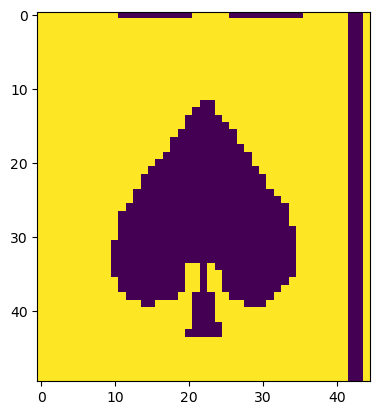

In [57]:
gray = cv2.cvtColor(crop_color(extracted_cards[3]),cv2.COLOR_BGR2GRAY)
flag, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)

plt.imshow(thresh)
plt.show()

In [ ]:
cv2.findContours(,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

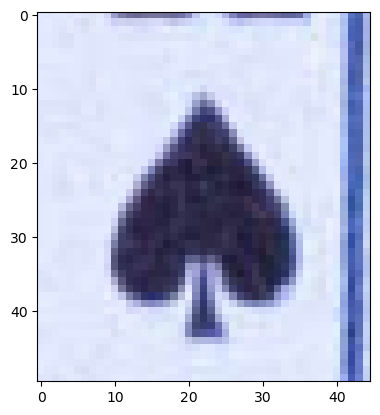

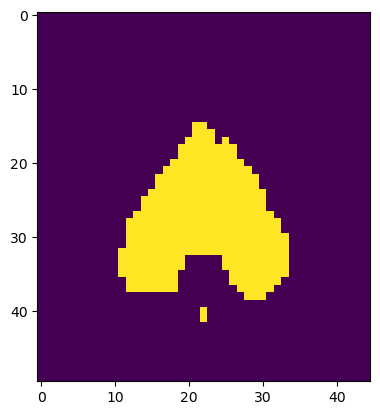

IndexError: index 75 is out of bounds for axis 0 with size 50

In [142]:
#test_card = extracted_cards[3]
test_card = card_imgs[3]
plt.imshow(test_card)
plt.show()

red_pix = (test_card[:,:,0] >100) & (test_card[:,:,1] < 40) & (test_card[:,:,2] > 40)
black_pix = (test_card[:,:,0]< 100) & (test_card[:,:,1] < 100) & (test_card[:,:,2] < 100)

if (red_pix.sum())
plt.imshow(black_pix)
plt.show()

test_card[75, 75]

In [82]:
test_card[:,:,1].shape

(50, 45)

In [83]:
res.shape

AttributeError: 'tuple' object has no attribute 'shape'